Automatically created module for IPython interactive environment


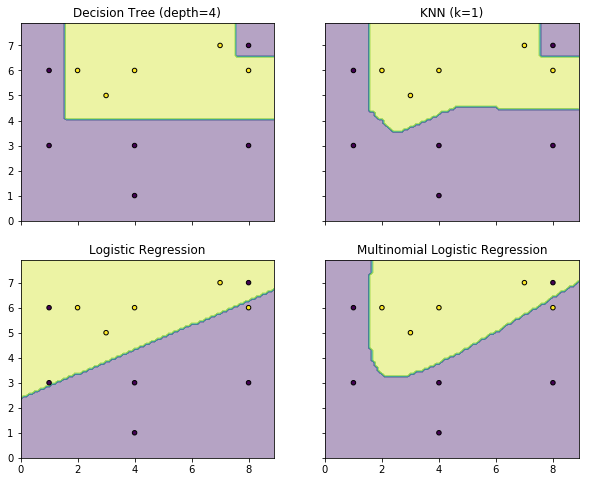

In [59]:
print(__doc__)

from itertools import product

import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression #logistic regression classifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Loading some example data

X = np.array([[1,3], [1,6], [2,6], [3,5], [4,1], [4,3], [4,6], [7,7], [8,6], [8,7], [8,3]])

y = np.array([0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0])

poly = PolynomialFeatures(degree=2)


# Training classifiers
clf1 = DecisionTreeClassifier()
clf2 = KNeighborsClassifier(n_neighbors=1)
clf3 = LogisticRegression()
eclf = make_pipeline(PolynomialFeatures(2), LogisticRegression())

clf1.fit(X, y)
clf2.fit(X, y)
clf3.fit(X, y)
eclf.fit(X, y)

# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [clf1, clf2, clf3, eclf],
                        ['Decision Tree (depth=4)', 'KNN (k=1)',
                         'Logistic Regression', 'Multinomial Logistic Regression']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

# Analysis:

A perfect classification of samples has only been observable on decision trees and k-nearest neighbor classifiers.
Logistic regression has incorrectly classified four samples, and multinomial - two of them.

A limitation of this dataset is that it's relatively small. It might be difficult to determine whether one can extrapolate assumptions about the data estimators with only 11 samples. 

However, due to vast amount of misclassification, we can put simple logistic regression out of the question.
Multinomial logistic regression might be quite accurate in the long run, since it does a good job at fitting data without overfitting.

One ambiguous part about the data is the black dot at the upper right corner. It night be a legitimate part of the pattern, but to me it seems kind of anomalous. Decision trees and k-nn have both fit that one point to the decision boundary. Might not be the most accurate prediction in the long run.

Verdict: for small datasets like this k-nn and decision tree would be good, but multinomial logistic regression could provide better estimates in the long run, on bigger sets of data.
